In [1]:
!pip install matplotlib qiskit qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 5.1 MB/s eta 0:00:00


In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
import numpy as np

In [3]:
# Function to simulate entanglement and measurement with 'n' qubits
def perform_game_simulation(n):
    # Create a quantum circuit with n qubits and n classical bits for measurement
    qc = QuantumCircuit(n, n)

    # Apply Hadamard gate to each qubit to create superposition
    for i in range(n):
        qc.h(i)

    # Apply entangling operations (CNOT gates)
    for i in range(n - 1):
        qc.cx(i, i + 1)

    # Measure the qubits
    qc.measure(range(n), range(n))  # Measure all qubits

    # Use Qiskit's Aer simulator to simulate the circuit
    simulator = Aer.get_backend('aer_simulator')  # Updated to 'aer_simulator'
    transpiled_qc = transpile(qc, simulator)  # Transpile the circuit for the simulator
    result = simulator.run(transpiled_qc, shots=1).result()  # Run the simulation directly on the transpiled circuit
    counts = result.get_counts(qc)

    # Get the measurement outcomes (as bitstrings)
    outcomes = list(counts.keys())[0]

    # Convert bitstring outcomes to integer measurements
    measurements = [int(outcome) for outcome in outcomes]

    return measurements

In [4]:
# Classical function to simulate payoff based on strategy and measurement
def evaluate_payoff(measurement, resource_request):
    return measurement * resource_request  # Payoff is proportional to the measurement outcome

In [5]:
 # Quantum Game Theory Resource Allocation Algorithm
def quantum_game_theory_resource_allocation(N, E, S, maxIterations, epsilon):
    n = len(N)  # Number of nodes (or qubits)
    resources = [E/n] * n  # Initially allocate equal resources to all nodes
    strategies = np.random.choice(S, n)  # Randomly assign initial strategies

    for k in range(maxIterations):
        resource_requests = []
        measurements = []
        payoffs = []

        # Step 1: Each node requests resources based on its strategy
        for i in range(n):
            resource_request = np.random.uniform(0, resources[i])  # Random resource request based on current allocation
            resource_requests.append(resource_request)

        # Step 2: Perform quantum game simulation
        measurements = perform_game_simulation(n)

        # Step 3: Evaluate payoffs for each node based on the measurement and resource request
        for i in range(n):
            payoff = evaluate_payoff(measurements[i], resource_requests[i])
            payoffs.append(payoff)

        # Step 4: Adjust resources based on the payoffs
        total_payoff = sum(payoffs)
        if total_payoff > 0:
            for i in range(n):
                resources[i] += (payoffs[i] / total_payoff) * (E - sum(resources))  # Redistribute available resources

        # Step 5: Check for convergence
        if all(abs(payoffs[i] - payoffs[i-1]) < epsilon for i in range(1, n)):
            break

    return resources

Evaluating for 2 qubits (nodes):
Allocated resources: [50.0, 50.0]

Evaluating for 3 qubits (nodes):
Allocated resources: [33.333333333333336, 33.333333333333336, 33.333333333333336]

Evaluating for 4 qubits (nodes):
Allocated resources: [25.0, 25.0, 25.0, 25.0]

Evaluating for 5 qubits (nodes):
Allocated resources: [20.0, 20.0, 20.0, 20.0, 20.0]

Evaluating for 10 qubits (nodes):
Allocated resources: [10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]

Evaluating for 20 qubits (nodes):
Allocated resources: [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]

Evaluating for 25 qubits (nodes):
Allocated resources: [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]



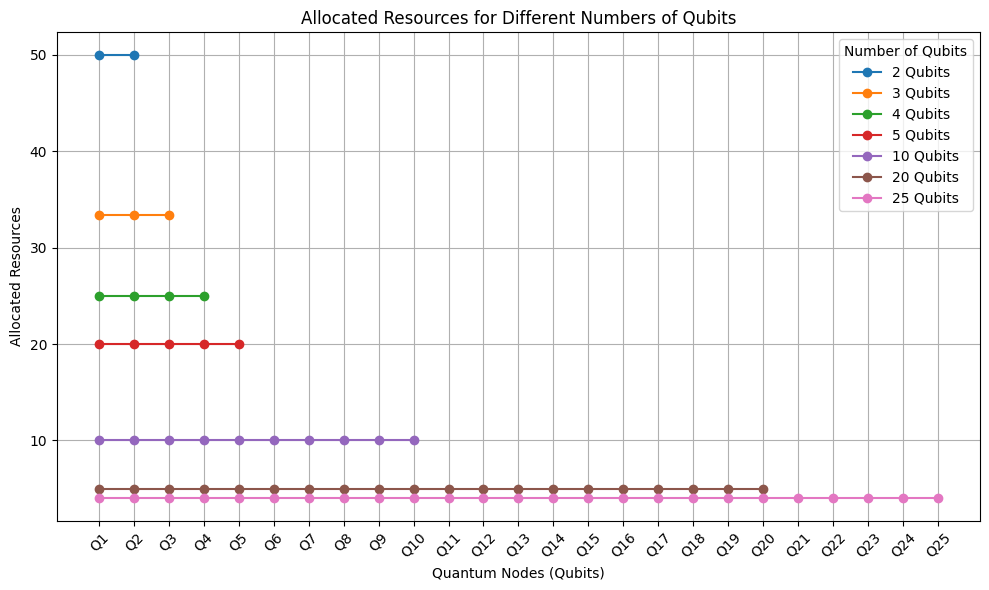

In [6]:
import matplotlib.pyplot as plt

# Function to evaluate the algorithm for different numbers of qubits and store results
def evaluate_for_qubits(qubit_list, E, S, maxIterations, epsilon):
    results = []  # List to store allocated resources for each qubit count
    for n in qubit_list:
        N = [f'Q{i+1}' for i in range(n)]  # Create list of quantum nodes
        print(f"Evaluating for {n} qubits (nodes):")
        allocated_resources = quantum_game_theory_resource_allocation(N, E, S, maxIterations, epsilon)
        print(f"Allocated resources: {allocated_resources}\n")
        results.append(allocated_resources)  # Store the results

    return results

# Parameters
E = 100  # Total available entanglement
S = ['S1', 'S2', 'S3']  # Strategy set
maxIterations = 1000  # Maximum number of iterations
epsilon = 0.01  # Convergence threshold

# Evaluate for different numbers of qubits (e.g., 2, 3, 4, 5, 10, 20)
qubit_list = [2, 3, 4, 5, 10, 20, 25]
allocated_resources_results = evaluate_for_qubits(qubit_list, E, S, maxIterations, epsilon)

# Plotting the results
plt.figure(figsize=(10, 6))
for i, n in enumerate(qubit_list):
    plt.plot([f'Q{i+1}' for i in range(n)], allocated_resources_results[i], marker='o', label=f'{n} Qubits')

plt.title('Allocated Resources for Different Numbers of Qubits')
plt.xlabel('Quantum Nodes (Qubits)')
plt.ylabel('Allocated Resources')
plt.xticks(rotation=45)
plt.legend(title='Number of Qubits')
plt.grid()
plt.tight_layout()
plt.show()